analyze_chr_i(i) - i - индекс хромосомы с 0
строит графики:
- матрица расстояний, сгенерированная из pdb кривой (хитмап)
- плотность распределения количества бинов в зависимости от расстояния между ними (в мм)
- наблюдаемое значение hic в зависимости от расстояния между бинами,
BUCKETS_CNT - расмматриваем пары бинов, попадающие в один бакет по расстоянию между ними.
Внутри бакета значения hic усредняются и строится hic = f(dist).
Длина в мм одного бакета max(dist) - min(dist) / BUCKETS_CNT соответственно
- Отлогарифмированный предыдущий график, зависимость ln(hic) от ln(dist), к нему применяется
линейная регрессия, после этого можно узнать коэффициенты зависимости между
hic и матрицей расстояний, сгенерированной из pdb файла

Предполагаемая зависимость
DIST[i][j] = 1 / HIC[i][j]^factor
factor = k^-1
i, j - любая пара бинов

Некоторые программы по типу 3DMax уже выдают оптимальный factor, с которым строилась кривая в pdb,
этот график также позволяет сравнить их распределение с заявленным

Также на этом графике прозрачным нарисована плотность распределения (координаты xs были отлогарифмированы для удобства
наложения графиков)

In [1]:
from main import analyze_chr_i

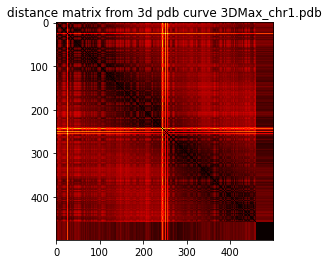

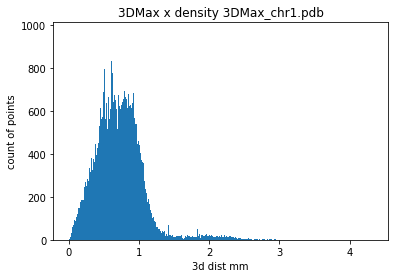

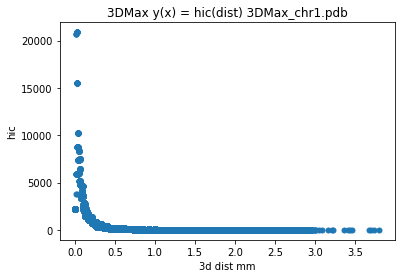

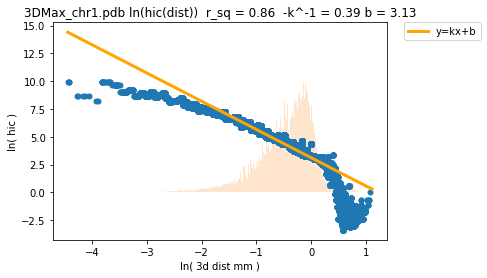

In [2]:
analyze_chr_i(0, file_name='3DMax_chr1.pdb')

В logs/analyzer.log можно посмотреть подробную информацию по анализу.
Основная продублирована на графиках (в тайтле), например factor, то есть k^-1, его можно сравнить с тем оптимальным factor,
что выдает 3DMax.
Например, для первого запуска 3DMax искал оптимальный factor с [0.1, 2.0] с шагом 0.1 и заявил, что
оптимальный 0.30

Во время выполнения analyze_chr_i координаты из pdb домножаются так, чтобы длина последовательности
соответствовала реальной (в bp) - хитмапы матрицы расстояний отрисовываются с учетом этого
(легко сравнивать разные программы)
в scaled_pdb_files лежат pdb в правильном размере (todo: не доделан парсер по размеру точки, чтобы рисовало
нужно заменять последний 2 столбца, пока что делаю это руками)

в PDBUtils есть функции для перевода bp в мм и обратно

In [3]:
from PDBUtils import mm_to_bp, bp_to_mm

In [4]:
mm_to_bp(85)

249857083

In [5]:
bp_to_mm(138394717)

47.08111853772344

Коэффициент для перевода был получен с помощью скрипта data/mm_bp_corr.py, сами данные взяты из википедии
https://en.wikipedia.org/wiki/Human_genome
и продублированны
в data/mm_to_bp_wiki.txt

во время анализа же использую данные о длине bp из cool файла (длины там немного отличаются)
см. Cooler Api
https://cooler.readthedocs.io/en/latest/api.html

HiCExtractor - удобная обертка для получения нужных мне данных из Cooler API
chr_i_hic - получает нужные сведения об i'й хромосоме, а именно
- hic матрицу
- количество бинов
- длину генома в bp

In [6]:
from HiCExtractor import chr_i_hic

In [7]:
hic, bins_cnt, bp = chr_i_hic(filepath='chr/Rao2014-IMR90-MboI-allreps-filtered.500kb.cool', i=0)


Проделаем то же самое для 2й хромосомы, но для начала сгенерируем hic в удобном для 3DMax формате

In [8]:
from HiCExtractor import chr_i_hic_to_txt_adj

In [9]:
chr_i_hic_to_txt_adj(filepath='chr/Rao2014-IMR90-MboI-allreps-filtered.500kb.cool', i=1)


Проанализируем 2ю хромосму:

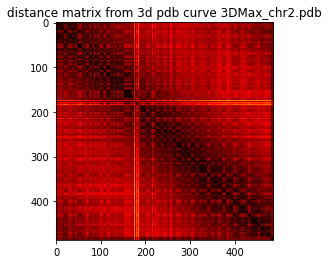

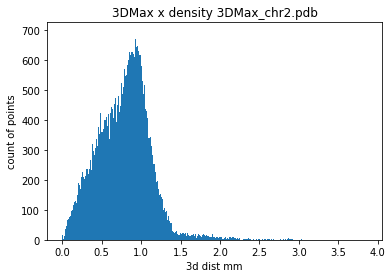

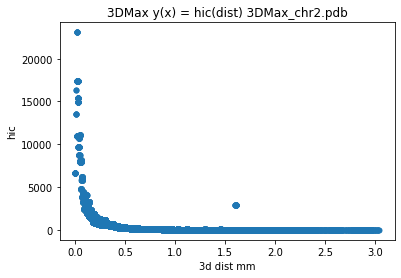

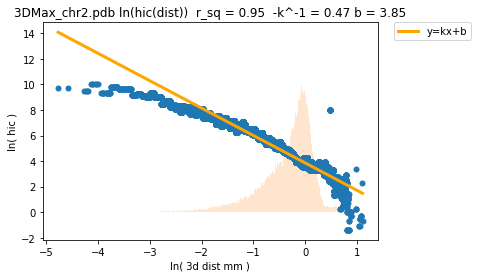

In [10]:
analyze_chr_i(1, file_name='3DMax_chr2.pdb')

Запуск в 3DMax для генерации pdb:
Оптимальное значение factor, выданное 3DMax в логах 0.3,
Количество итераций было поставлено на 1000

2ю хромосому с теми же параметрами, посмотрим, насколько 3DMax генерирует разные кривые на одном входе

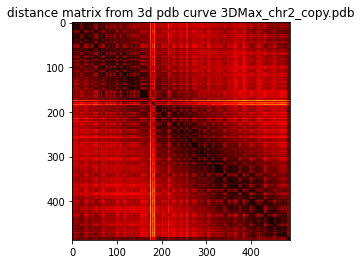

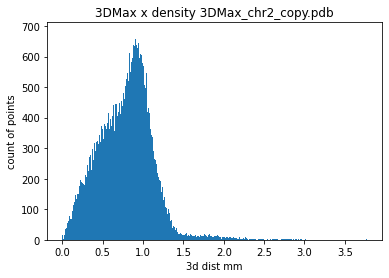

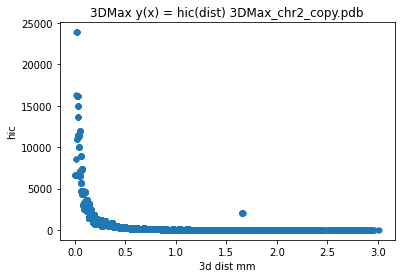

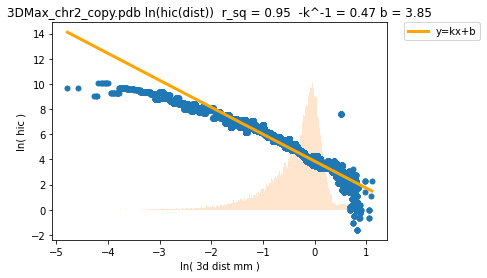

In [12]:
analyze_chr_i(1, file_name='3DMax_chr2_copy.pdb')

2ю хромосому, но с большим числом итераций в 3DMax
Проделаем то же самое, но сгенерируем pdb используя 10000 итераций, посмотрим насколько программа устойчива,
из логов узнаем, что 3DMax подобрал factor = 0.3 

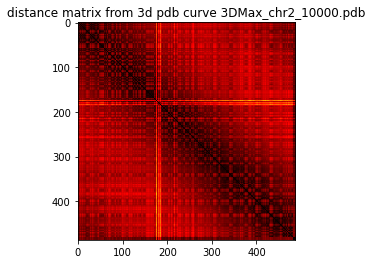

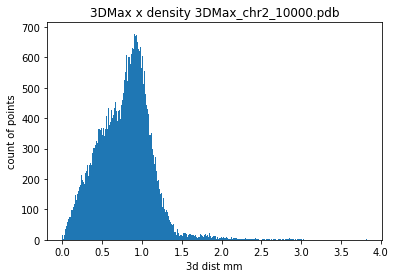

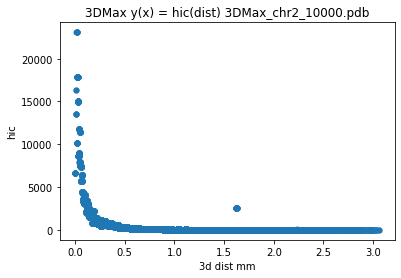

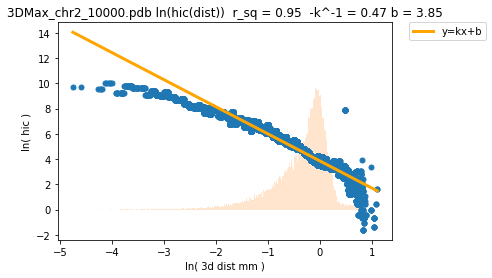

In [13]:
analyze_chr_i(1, file_name='3DMax_chr2_10000.pdb')

2ю хромосому с уже задананным в 3DMax factor = 1.2, iters = 1000

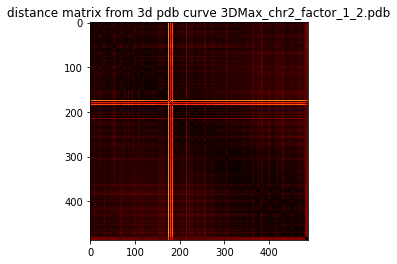

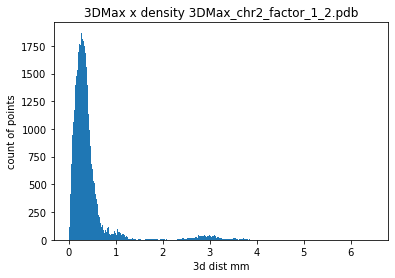

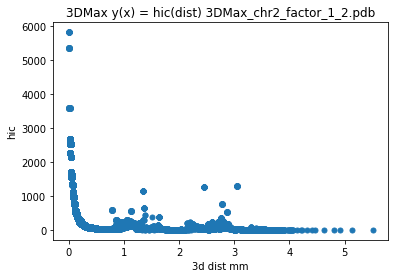

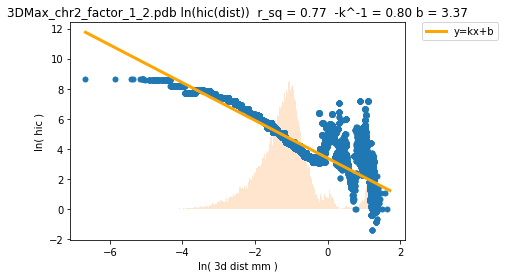

In [14]:
analyze_chr_i(1, file_name='3DMax_chr2_factor_1_2.pdb')

Проанализируем 3ю хромосому
best factor: 0.3 (0.3 на этом этапе стабильно выдается для всех хромосом) по мнению 3DMax


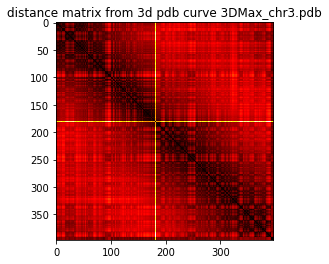

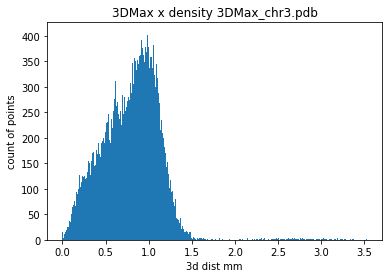

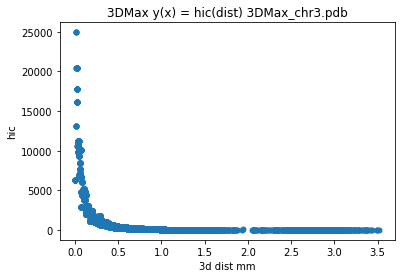

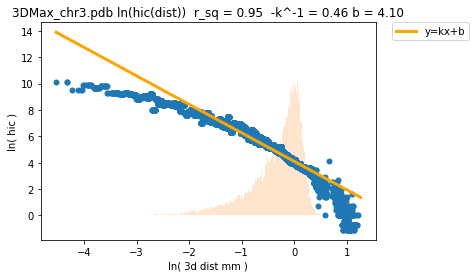

In [15]:
analyze_chr_i(2, file_name='3DMax_chr3.pdb')


первая хромосома Simba3d
simba3d -r tasks/taskChr2.json для запуска из терминала
получившийся json в pdb через simba3d_make_pdb.py (в parameters передать путь к json)

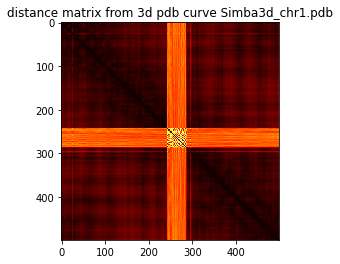

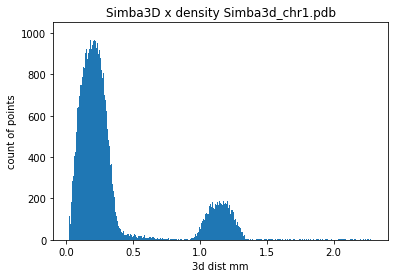

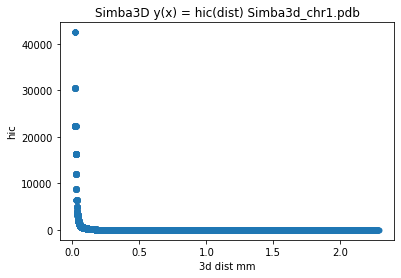

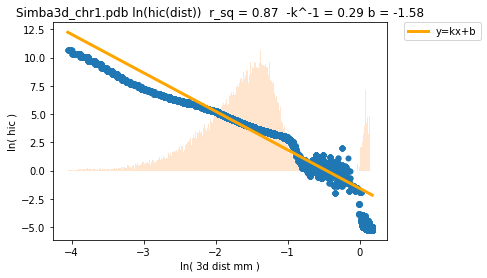

In [16]:
analyze_chr_i(0, SOFT_NAME='Simba3D', file_name='Simba3d_chr1.pdb')

вторая хромосома Simba3d

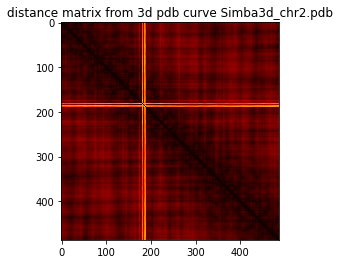

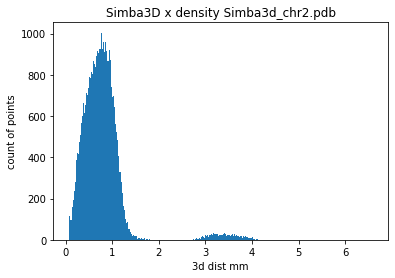

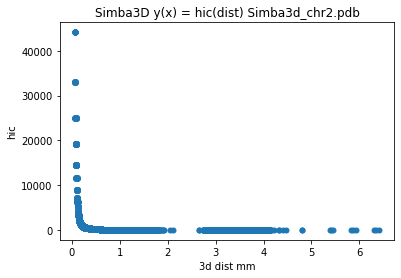

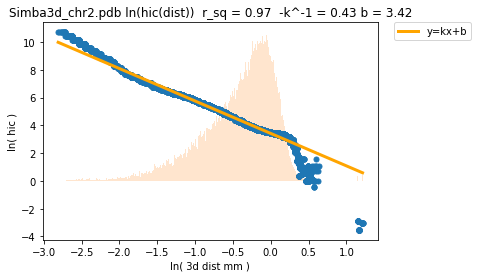

In [17]:
analyze_chr_i(1, SOFT_NAME='Simba3D', file_name='Simba3d_chr2.pdb')

третья хромосома Simba3d

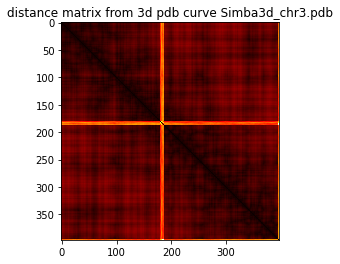

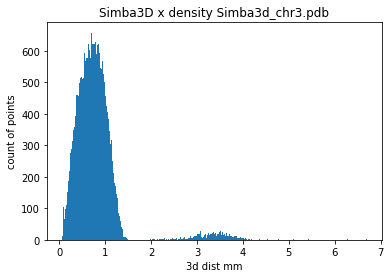

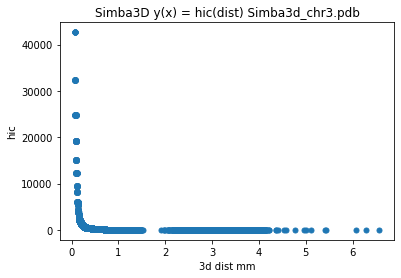

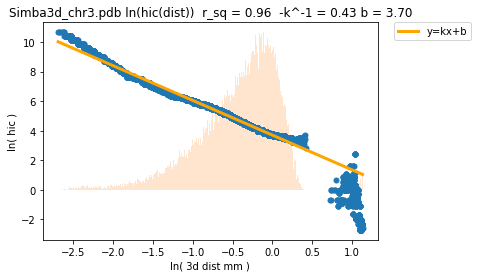

In [18]:
analyze_chr_i(2, SOFT_NAME='Simba3D', file_name='Simba3d_chr3.pdb')


Нагенерим все хромосомы для Simba3d, рисуя только отлогарифмированные графики

In [19]:
from tqdm import tqdm

  0%|          | 0/21 [00:00<?, ?it/s]

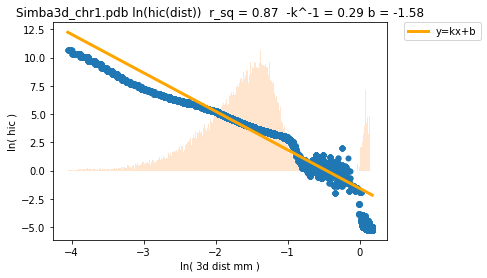

  5%|▍         | 1/21 [00:04<01:36,  4.82s/it]

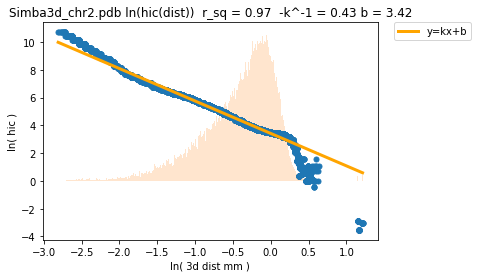

 10%|▉         | 2/21 [00:09<01:29,  4.70s/it]

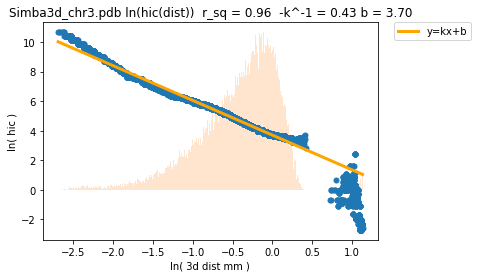

 14%|█▍        | 3/21 [00:13<01:16,  4.27s/it]

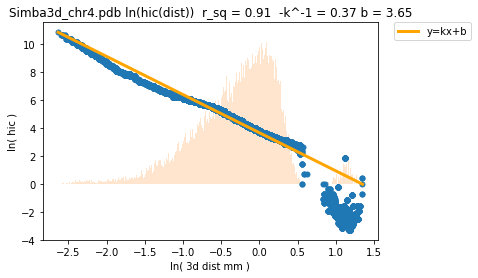

 19%|█▉        | 4/21 [00:16<01:08,  4.03s/it]

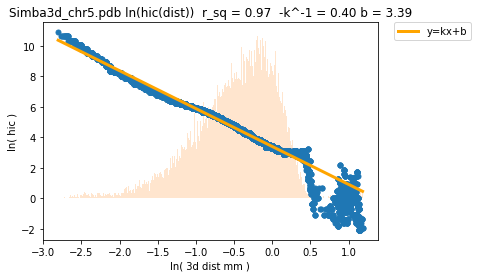

 24%|██▍       | 5/21 [00:20<01:01,  3.87s/it]

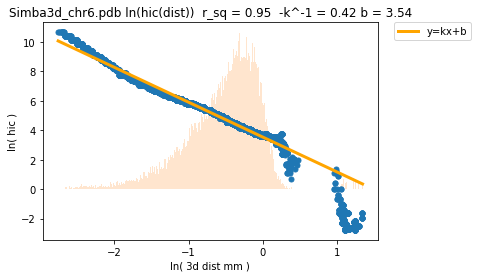

 29%|██▊       | 6/21 [00:23<00:56,  3.74s/it]

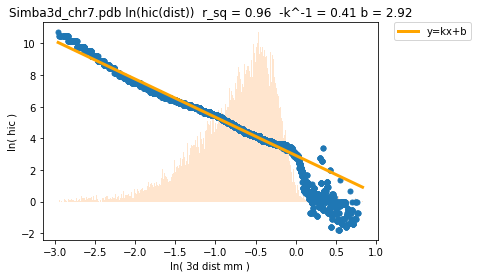

 33%|███▎      | 7/21 [00:27<00:50,  3.62s/it]

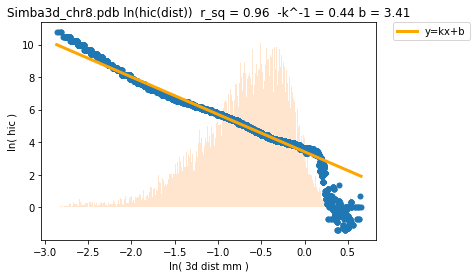

 38%|███▊      | 8/21 [00:30<00:44,  3.46s/it]

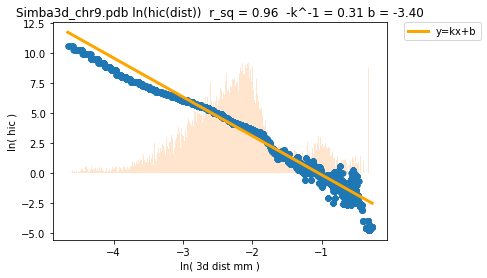

 43%|████▎     | 9/21 [00:33<00:40,  3.35s/it]

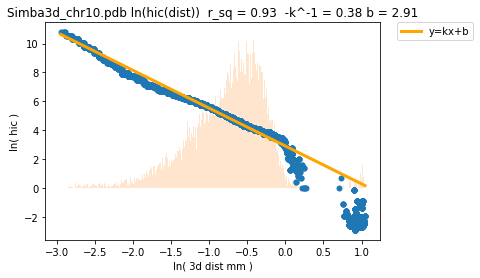

 48%|████▊     | 10/21 [00:36<00:35,  3.24s/it]

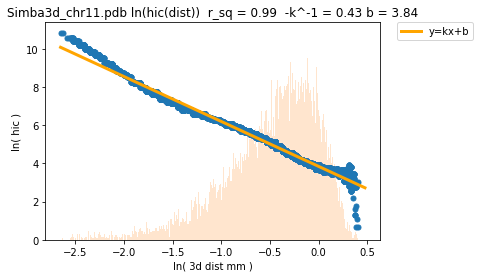

 52%|█████▏    | 11/21 [00:39<00:31,  3.16s/it]

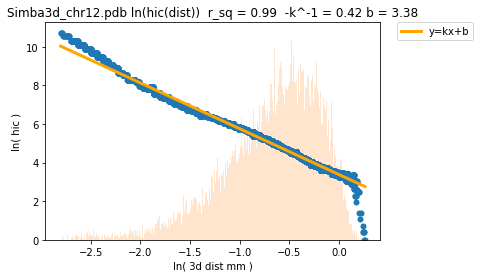

 57%|█████▋    | 12/21 [00:42<00:27,  3.09s/it]

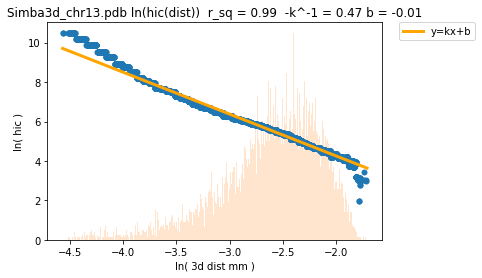

 62%|██████▏   | 13/21 [00:45<00:23,  2.99s/it]

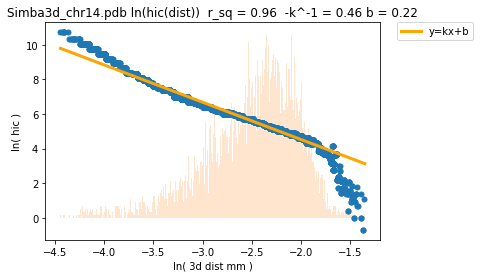

 67%|██████▋   | 14/21 [00:47<00:20,  2.89s/it]

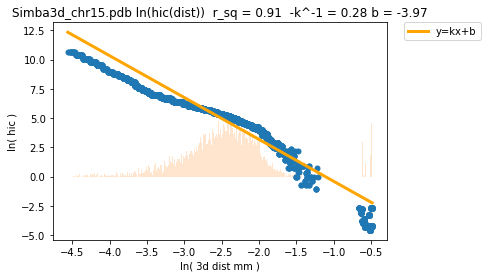

 71%|███████▏  | 15/21 [00:50<00:16,  2.82s/it]

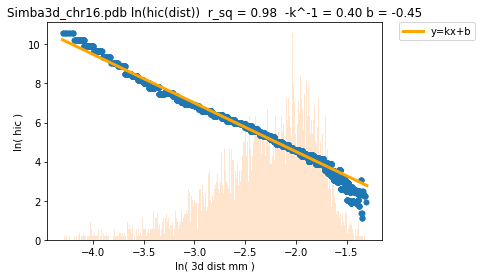

 76%|███████▌  | 16/21 [00:53<00:13,  2.74s/it]

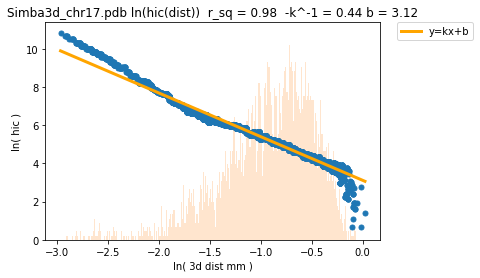

 81%|████████  | 17/21 [00:55<00:10,  2.67s/it]

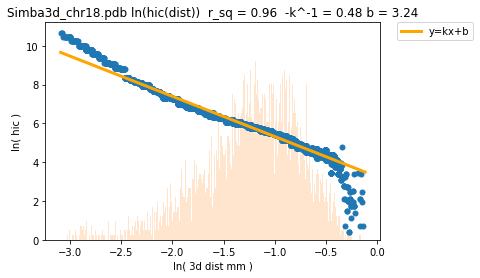

 86%|████████▌ | 18/21 [00:57<00:07,  2.57s/it]

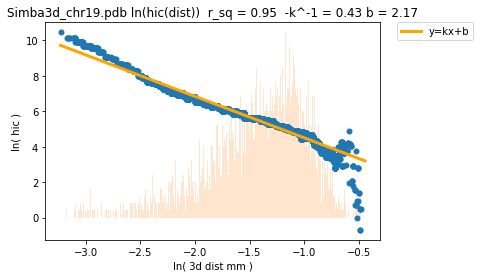

 90%|█████████ | 19/21 [01:00<00:05,  2.51s/it]

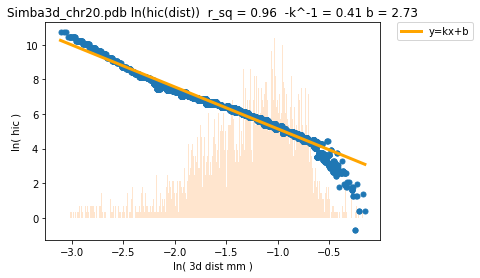

 95%|█████████▌| 20/21 [01:02<00:02,  2.45s/it]

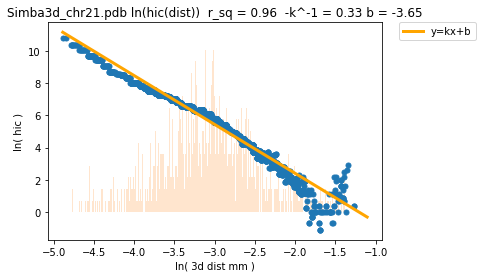

100%|██████████| 21/21 [01:04<00:00,  3.09s/it]


In [20]:
for i in tqdm(range(21)):
    analyze_chr_i(i=i, SOFT_NAME='Simba3D', file_name=f'Simba3d_chr{i+1}.pdb',
                  dist_plot_on=False, dens_plot_on=False, hic_from_dist_plot_on=False, ln_hic_dist_plot_on=True)

